# Data Preprocessing

## 1. Import Libraries

In [85]:
import re
import pandas as pd 
from tqdm import tqdm
tqdm.pandas()
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.layers import Input
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from keras.models import Model
from matplotlib import pyplot as plt
import keras


## 2. Load and Inspect Data

In [86]:
file_path = "D:\main project\data\spam_or_not_spam.csv"
df = pd.read_csv(file_path)
print(df.head())

                                               email  label
0   date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...      0
1  martin a posted tassos papadopoulos the greek ...      0
2  man threatens explosion in moscow thursday aug...      0
3  klez the virus that won t die already the most...      0
4   in adding cream to spaghetti carbonara which ...      0


In [87]:
print(df.shape)

(3000, 2)


## 3. Get Class Percentage

In [88]:
spam_percentage = (df["label"].value_counts()*100/df.shape[0])[1]
ham_percentage = (df["label"].value_counts()*100/df.shape[0])[0]
print(f"Percentage of spam emails: {spam_percentage:.2f}%")

Percentage of spam emails: 16.67%


## 4. Function to Remove Given RegEx pattern

In [89]:
def remove_pattern(text, pattern):
    cleaned_text = re.sub(pattern, "", str(text))
    return " ".join(cleaned_text.split(" "))

## 5. Remove Unnecessary Patterns

In [90]:
# Lambda expression to remove pattern NUMBER from the text
df["email"] = df["email"].progress_apply(lambda x: remove_pattern(x, "NUMBER"))


100%|██████████| 3000/3000 [00:00<00:00, 36113.79it/s]


In [91]:

# Write Lambda expression to remove pattern URL from the text
df["email"] = df["email"].progress_apply(lambda text: remove_pattern(text, r'https?://\S+|www\.\S+'))


100%|██████████| 3000/3000 [00:00<00:00, 27143.91it/s]


In [92]:

# Write Lambda expression to remove underscores from the text

df["email"] = df["email"].progress_apply(lambda text: remove_pattern(text,"_"))


100%|██████████| 3000/3000 [00:00<00:00, 36580.57it/s]


In [93]:

# Write Lambda expression to remove emails from the text

df["email"] = df["email"].progress_apply(lambda text: remove_pattern(text, r'\S+@\S+'))


100%|██████████| 3000/3000 [00:00<00:00, 11502.79it/s]


In [94]:


# Write Lambda expression to remove digits
df["email"] = df["email"].progress_apply(lambda text: remove_pattern(text,r'\d'))



100%|██████████| 3000/3000 [00:00<00:00, 22395.50it/s]


In [95]:
df

,email,label
0,date wed aug from chris garrigues cwg d...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0
3,klez the virus that won t die already the most...,0
4,in adding cream to spaghetti carbonara which ...,0
...,...,...
2995,abc s good morning america ranks it the chri...,1
2996,hyperlink hyperlink hyperlink let mortgage le...,1
2997,thank you for shopping with us gifts for all ...,1
2998,the famous ebay marketing e course learn to s...,1


## 6. Function to Replace Text

In [96]:
def replace_text(text,source_pattern, destination_pattern):
    text = text.replace(source_pattern, destination_pattern)
    return text

## 7. Decontraction of Phrases

In [97]:
 #Write Lamda Expression to replace pattern won't to will not
df["email"] = df["email"].progress_apply(lambda x: replace_text(x,"won't", "will not"))


100%|██████████| 3000/3000 [00:00<00:00, 344897.95it/s]


In [98]:

# Write Lamda Expression to replace pattern can't --> can not
df["email"] = df["email"].progress_apply(lambda x: replace_text(x,"can't", "can not"))


100%|██████████| 3000/3000 [00:00<00:00, 272687.93it/s]


In [99]:

# Write Lamda Expression to replace pattern n't --> not
df["email"] = df["email"].progress_apply(lambda x: replace_text(x,"n't", "not"))


100%|██████████| 3000/3000 [00:00<00:00, 203695.98it/s]


In [100]:

# Write Lamda Expression to replace pattern 're --> are
df["email"] = df["email"].progress_apply(lambda x: replace_text(x,"'re", "are"))


100%|██████████| 3000/3000 [00:00<00:00, 312401.61it/s]


In [101]:

# Write Lamda Expression to replace pattern 's -> is
df["email"] = df["email"].progress_apply(lambda x: replace_text(x,"'s", "is"))


100%|██████████| 3000/3000 [00:00<00:00, 291473.52it/s]


In [102]:

# Write Lamda Expression to replace pattern 'd -> would
df["email"] = df["email"].progress_apply(lambda x: replace_text(x,"'d", "would"))


100%|██████████| 3000/3000 [00:00<00:00, 284552.51it/s]


In [103]:

# Write Lamda Expression to replace pattern 'll -> will
df["email"] = df["email"].progress_apply(lambda x: replace_text(x,"'ll", "will"))


100%|██████████| 3000/3000 [00:00<00:00, 352917.26it/s]


In [104]:

# Write Lamda Expression to replace pattern 've -> have
df["email"] = df["email"].progress_apply(lambda x: replace_text(x,"'ve", "have"))


100%|██████████| 3000/3000 [00:00<00:00, 281541.00it/s]


In [105]:
# Write function to convert text to lowercase
def convert_to_lowercase(text):
    return text.lower()

df["email"] = df["email"].progress_apply(lambda x: convert_to_lowercase(x))






100%|██████████| 3000/3000 [00:00<00:00, 187410.26it/s]


In [106]:
df

,email,label
0,date wed aug from chris garrigues cwg d...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0
3,klez the virus that won t die already the most...,0
4,in adding cream to spaghetti carbonara which ...,0
...,...,...
2995,abc s good morning america ranks it the chri...,1
2996,hyperlink hyperlink hyperlink let mortgage le...,1
2997,thank you for shopping with us gifts for all ...,1
2998,the famous ebay marketing e course learn to s...,1


In [107]:

# Write function to replace non-alphabets
def replace_non_alphabets(text, replacement=' '):
    return re.sub(r'[^a-zA-Z]+', replacement, text)

df["email"] = df["email"].progress_apply(lambda x: replace_non_alphabets(x, ' '))

100%|██████████| 3000/3000 [00:00<00:00, 9116.34it/s] 


In [108]:
df

,email,label
0,date wed aug from chris garrigues cwg dated f...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0
3,klez the virus that won t die already the most...,0
4,in adding cream to spaghetti carbonara which ...,0
...,...,...
2995,abc s good morning america ranks it the chris...,1
2996,hyperlink hyperlink hyperlink let mortgage le...,1
2997,thank you for shopping with us gifts for all ...,1
2998,the famous ebay marketing e course learn to s...,1


## 8. Convert Feature Column to Categorical

In [109]:


# Example DataFrame with a feature column


# Convert the 'Feature' column to categorical


# Display the DataFrame



## 9. Separate Features and Labels

In [110]:


# Example DataFrame with features and labels


# Separate features and labels
X= df['email']
y=df['label']




# Display the separated features and labels


## 10. Perform Train-Test Split

In [111]:


# Example DataFrame with features and labels


# Separate features and labels


# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(
  X,y , random_state=104,test_size=0.25, shuffle=True)



# Display the shapes of the training and testing sets



In [112]:
df

,email,label
0,date wed aug from chris garrigues cwg dated f...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0
3,klez the virus that won t die already the most...,0
4,in adding cream to spaghetti carbonara which ...,0
...,...,...
2995,abc s good morning america ranks it the chris...,1
2996,hyperlink hyperlink hyperlink let mortgage le...,1
2997,thank you for shopping with us gifts for all ...,1
2998,the famous ebay marketing e course learn to s...,1


## 11. Compute maximum number of words in all emails

In [113]:


# Assuming you have a DataFrame with an 'Emails' column
# Replace 'your_data.csv' with the actual file containing your email data


# Assuming the 'Emails' column contains the text of emails
# You may need to preprocess the text if required (e.g., remove punctuation, lowercasing, etc.)

# Split each email into words and calculate the number of words in each email

# Find the maximum number of words across all emails
length_of_the_messages = df["email"].str.split("\\s+")

max_words=(length_of_the_messages.str.len().max())


## 12. Create Keras preprocessing Tokenizer Object

In [114]:
# Fit Tokenizer object on train data
# Encode X_train and X_test using the Tokenizer object
# Assuming you have a DataFrame with a 'Text' column
# Replace 'your_data.csv' with the actual file containing your text data
# Assuming 'Text' column contains the text data
# Split the data into training and testing sets
# Create a Tokenizer object
# Fit the tokenizer on the training data
# Encode the training and testing data using the fitted tokenizer
# Example of the encoded sequences
# If you want to pad the sequences to have the same length
# Example of the padded sequences

keras_tokenizer=tf.keras.preprocessing.text.Tokenizer(
    num_words=max_words)

keras_tokenizer.fit_on_texts(df["email"])

X_train_sequence=keras_tokenizer.texts_to_sequences(X_train)        
X_test_sequence=keras_tokenizer.texts_to_sequences(X_test)

## 13. Pad Input Sequences using Keras preprocessing pad_sequences function

In [115]:
#Pad the sequences to have the same length

# Display the shapes of the padded sequences

train_pad_sequence=pad_sequences(
X_train_sequence,
    maxlen=1000,
    padding='post',  
)
test_pad_sequence=pad_sequences(
X_test_sequence,
    maxlen=1000,
    padding='post',  
)






In [116]:
train_pad_sequence.shape

(2250, 1000)

## 14. Create Character Embedding 

In [117]:
#Create a Sequential model

# Add an Embedding layer for character embeddings

# Add an LSTM layer (you can use GRU or other recurrent layers as well)


# Add a Dense layer for classification (adjust units based on your specific task)


# Compile the model


# Display the model summary


# Modeling

## 15. Define Model Architecture Using Functional API

In [118]:
# Define the model using the Functional API

# Compile the model


# Display the model summary
input_layer= Input(shape=(1000,))
dense_layer1= Dense(16)(input_layer)
dense_layer2= Dense(32)(dense_layer1)
dense_layer3= Dense(64)(dense_layer2)
dense_layer4= Dense(128)(dense_layer3)
output_layer= Dense(2)(dense_layer4)

## 16. Define Optimizer (e.g. Adam)

In [119]:


# ... (previous code for data preprocessing and model definition)

# Compile the model with the Adam optimizer
optimizer_adam=Adam(
    learning_rate=0.001,

)

## 17. Write class for custom callback for micro-f1 score

## 18. Create Modelcheckpoint Callback

In [120]:
model_checkpoint_callback=keras.callbacks.ModelCheckpoint(
    filepath='D:\source_detection\model\model.hdf5',
    monitor="val_loss",
    verbose=0,
    save_best_only=True,
    save_weights_only=True,
    mode="min",
)

## 19. Create Callback for TensorBoard

## 20. Compile the Model

In [121]:
model = Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer_adam,
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=["accuracy"]
              )

## 21. Train the model using model.fit()

In [122]:
history=model.fit(
    x=train_pad_sequence,
    y=y_train,
    batch_size=32,
    epochs=25,
    validation_data=(test_pad_sequence, y_test),
    callbacks=[model_checkpoint_callback]
    )



Epoch 1/25


71/71 [==============================] - 2s 8ms/step - loss: 6.9914 - accuracy: 0.2036 - val_loss: 7.5075 - val_accuracy: 0.1907
Epoch 2/25
71/71 [==============================] - 0s 5ms/step - loss: 7.5211 - accuracy: 0.1791 - val_loss: 7.5075 - val_accuracy: 0.1907
Epoch 3/25
71/71 [==============================] - 0s 5ms/step - loss: 7.5210 - accuracy: 0.1791 - val_loss: 7.5075 - val_accuracy: 0.1907
Epoch 4/25
71/71 [==============================] - 0s 4ms/step - loss: 7.5210 - accuracy: 0.1796 - val_loss: 7.5075 - val_accuracy: 0.1907
Epoch 5/25
71/71 [==============================] - 0s 5ms/step - loss: 7.5244 - accuracy: 0.1796 - val_loss: 7.5075 - val_accuracy: 0.1907
Epoch 6/25
71/71 [==============================] - 0s 5ms/step - loss: 7.5243 - accuracy: 0.1796 - val_loss: 7.5075 - val_accuracy: 0.1907
Epoch 7/25
71/71 [==============================] - 0s 5ms/step - loss: 7.5243 - accuracy: 0.1800 - val_loss: 7.5075 - val_accuracy: 0.1907
Epoch 8/25
71/71 [=============

## 22. Plot Performance Curves Using history object

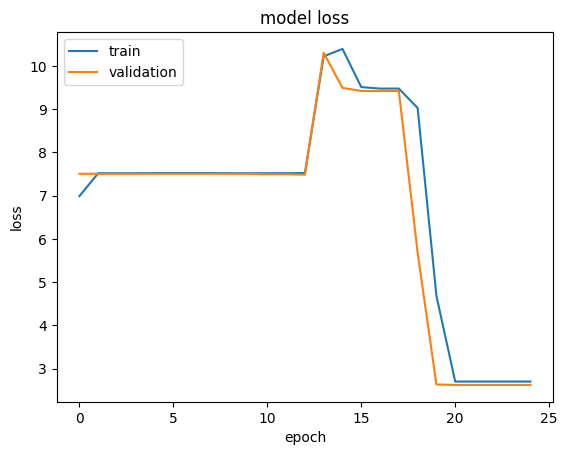

In [123]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## 23. Plot Model Architecture Using keras.utils plot_model function

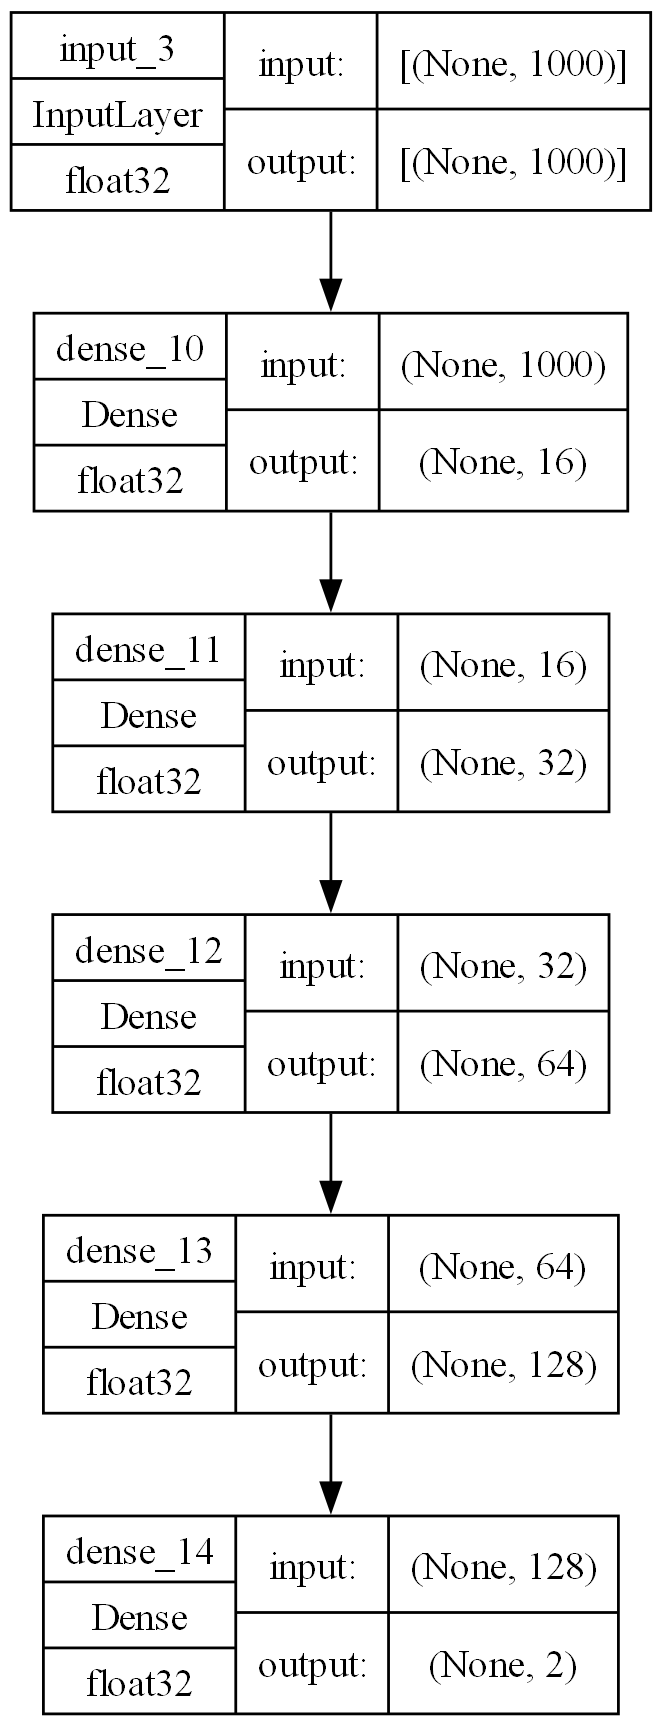

In [124]:
keras.utils.plot_model(
    model,
    to_file="D:\source_detection\plots\model.png",
    show_shapes=True,
    show_dtype=True,
    show_layer_names=True,
    dpi=200,
)